In [ ]:
%run LMS.ipynb

Stochastic Gradient Descent

In [15]:
def stochastic_gradient_descent(theta, x, y, alpha, iterations,epsilon):
    '''
    This function calculates the stochastic gradient descent

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,m)
        The input data.
    y : array-like of shape (n,)
        The target data.
    alpha : float
        The learning rate.
    iterations : int
        The number of iterations.
    
    Returns
    -------
    array-like of shape (n,)
        The output of the gradient descent.

    '''
    #calculate the gradient descent
    #store all the values of theta in a list and corresponding cost in another list
    theta_list = []
    cost_list = []
    #repeat until convergence
    #print(theta,"cost is",cost_function(theta, x, y))
    print(theta,"cost is",cost_function(theta, x, y))
    theta_list.append(theta)
    cost_list.append(cost_function(theta, x, y))
    for u in range(iterations):
        for i in range(1,len(y)):
            for j in range(len(theta)):
                theta[j] = theta[j] + alpha*(1/(len(y)))*(y[i]-hypothesis(theta,x[i]))*x[i][j]
        print(theta,"cost is",cost_function(theta, x, y))
        theta_list.append(theta)
        cost_list.append(cost_function(theta, x, y))
        if u>0:
            if cost_list[u-1]-cost_list[u] < epsilon:
                break
        

    return theta, theta_list, cost_list

In [16]:
theta = np.zeros(3)
theta[1]=6
theta[2]=8
theta, theta_list, cost_list = stochastic_gradient_descent(theta, X_train, y_train, 0.1, 1000,0.01)
itrs=len(cost_list)
print(itrs)

[0. 6. 8.] cost is 85710.69545516712
[0.00977546 5.09884724 7.13011595] cost is 64242.62542608838
[0.01474178 4.329022   6.37075517] cost is 48242.486430680205
[0.01596297 3.67214073 5.7070845 ] cost is 36310.97679767938
[0.01431584 3.11236544 5.12629637] cost is 27407.47885406691
[0.01051971 2.63605235 4.61733057] cost is 20758.05672600167
[0.00516169 2.23144892 4.17063443] cost is 15787.060158985922
[-1.28194964e-03  1.88843266e+00  3.77795594e+00] cost is 12066.276391861342
[-0.00842754  1.59828603  3.43216528] cost is 9277.126945488408
[-0.01596867  1.35350234  3.12710103] cost is 7182.5619224398015
[-0.02366312  1.14761844  2.85743736] cost is 5606.163502572283
[-0.03132191  0.9750705   2.61856963] cost is 4416.608907106768
[-0.03879998  0.83106969  2.40651559] cost is 3516.117790231287
[-0.04598841  0.71149502  2.21783026] cost is 2831.861872688784
[-0.05280781  0.61280093  2.04953245] cost is 2309.576927491851
[-0.05920284  0.53193769  1.89904137] cost is 1908.8122079421294
[-0.

Text(0.5, 1.0, 'Error vs. Training Epoch')

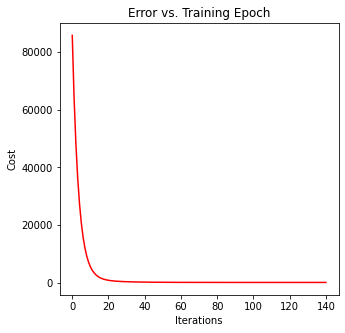

In [17]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(itrs), cost_list, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [19]:
plot_hypothesis_plane_plotly(theta)

[-0.04432013  0.77925863  0.01602303]


[-0.04432013  0.77925863  0.01602303]


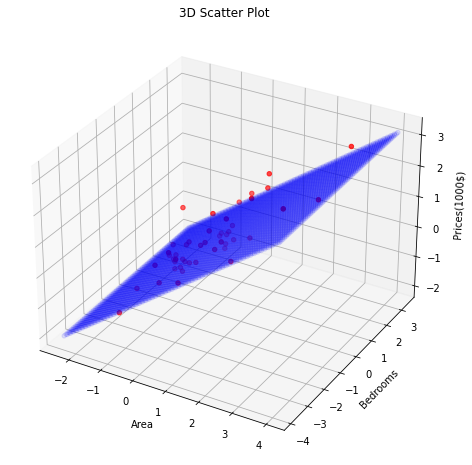

In [18]:
plot_hypothesis_plane(theta)